In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Heating

In [2]:
df = pd.read_csv("DC.csv")
df

,Capacitance,Capacitance 2
0,405,403
1,407,405
2,409,406
3,410,408
4,414,411
5,416,414
6,420,417
7,423,421
8,428,426
9,434,430


In [4]:
temp = np.arange(40, 171, 5)
df["Temperature"] = temp

In [5]:
df

,Capacitance,Capacitance 2,Temperature
0,405,403,40
1,407,405,45
2,409,406,50
3,410,408,55
4,414,411,60
5,416,414,65
6,420,417,70
7,423,421,75
8,428,426,80
9,434,430,85


In [6]:
df["Dielectric1"] = df["Capacitance"]/0.349
df["Dielectric2"] = df["Capacitance 2"]/0.349

In [9]:
plt.rcdefaults()

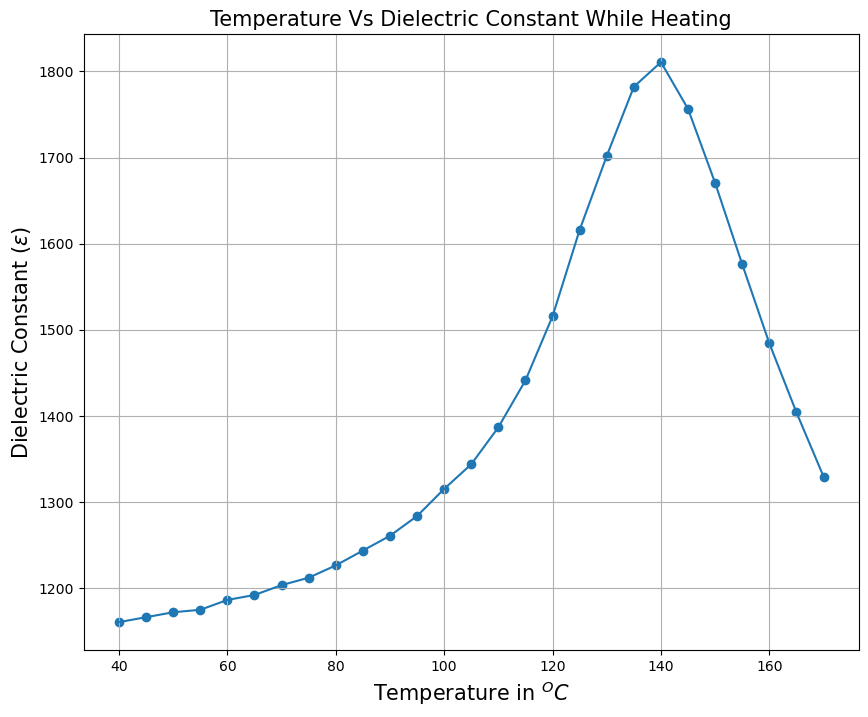

In [13]:
plt.figure(figsize = (10, 8))
plt.plot(df["Temperature"], df["Dielectric1"])
plt.scatter(df["Temperature"], df["Dielectric1"])
plt.xlabel("Temperature in $^O C$", fontsize=15)
plt.ylabel("Dielectric Constant $(\epsilon)$", fontsize=15)
plt.title("Temperature Vs Dielectric Constant While Heating", fontsize=15)
plt.grid()
plt.savefig("DC1.pdf")


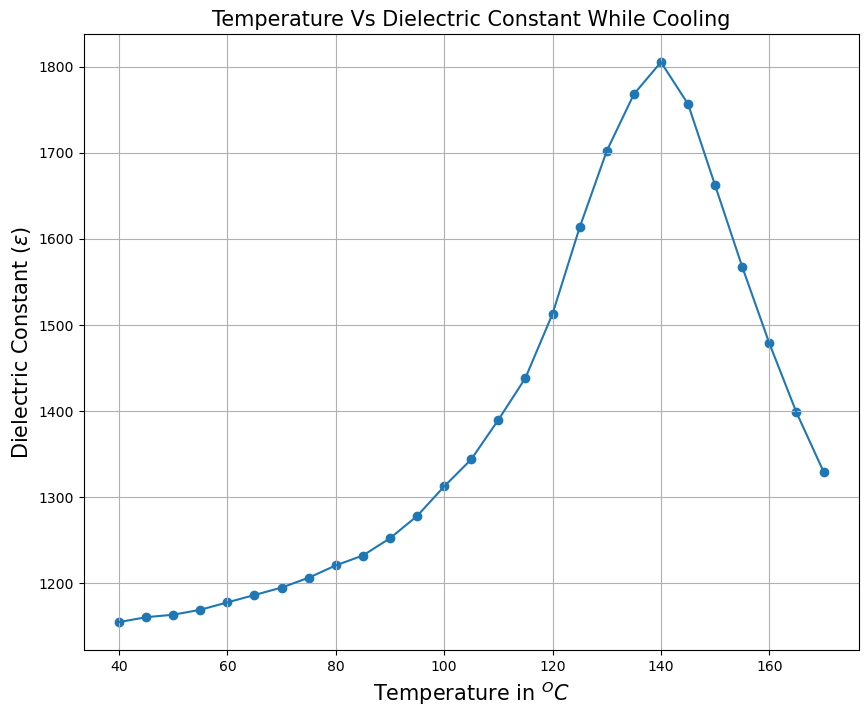

In [14]:
plt.figure(figsize = (10, 8))
plt.plot(df["Temperature"], df["Dielectric2"])
plt.scatter(df["Temperature"], df["Dielectric2"])
plt.xlabel("Temperature in $^O C$", fontsize=15)
plt.ylabel("Dielectric Constant $(\epsilon)$", fontsize=15)
plt.title("Temperature Vs Dielectric Constant While Cooling", fontsize=15)
plt.grid()
plt.savefig("DC2.pdf")


In [31]:
df.columns = ["Temperature in Degree Celcius", "Capacitance in pF", "Dielectric Constant"]
df

,Temperature in Degree Celcius,Capacitance in pF,Dielectric Constant
0,400.0,40,1146.131805
1,401.0,45,1148.997135
2,403.0,50,1154.727794
3,405.0,55,1160.458453
4,407.0,60,1166.189112
5,410.0,65,1174.785100
6,414.0,70,1186.246418
7,417.0,75,1194.842407
8,424.0,80,1214.899713
9,429.0,85,1229.226361


In [32]:
df.to_html("Data2.html")

## Cooling

In [18]:
df = pd.read_csv("data2.csv")
df

,Temperature(Celcius)
0,400.0
1,401.0
2,403.0
3,405.0
4,407.0
5,410.0
6,414.0
7,417.0
8,424.0
9,429.0


In [19]:
temps = np.arange(40,166, 5)

In [20]:
df["Temperature"] = temps

In [23]:
df = df.dropna()

In [25]:
df.columns = ["Capacitance", "Temperature"]
df

,Capacitance,Temperature
0,400.0,40
1,401.0,45
2,403.0,50
3,405.0,55
4,407.0,60
5,410.0,65
6,414.0,70
7,417.0,75
8,424.0,80
9,429.0,85
